In [1]:
import os
import numpy as np
import random
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

# Set correct base directory
BASE_DIR = "../data/training"

# Folder paths
IMG_FLOODED = os.path.join(BASE_DIR, "img_flooded")
MASK_FLOODED = os.path.join(BASE_DIR, "mask_flooded")
IMG_NON_FLOODED = os.path.join(BASE_DIR, "image_non_flooded")
MASK_NON_FLOODED = os.path.join(BASE_DIR, "mask_non_flooded")

# Sanity check
print("Folder structure check:")
for path in [IMG_FLOODED, MASK_FLOODED, IMG_NON_FLOODED, MASK_NON_FLOODED]:
    print(f"{path} | Exists: {os.path.exists(path)} | Files: {len(glob(os.path.join(path, '*')))}")

Folder structure check:
../data/training/img_flooded | Exists: True | Files: 51
../data/training/mask_flooded | Exists: True | Files: 51
../data/training/image_non_flooded | Exists: True | Files: 347
../data/training/mask_non_flooded | Exists: True | Files: 347


In [2]:
def normalize_name(filename):
    """Removes extension and '_lab' suffix if present."""
    name = os.path.splitext(os.path.basename(filename))[0]
    name = name.replace('_lab', '')  # normalize mask names
    return name

def check_alignment(img_dir, mask_dir):
    img_files = glob(os.path.join(img_dir, "*"))
    mask_files = glob(os.path.join(mask_dir, "*"))
    
    img_names = {normalize_name(p) for p in img_files}
    mask_names = {normalize_name(p) for p in mask_files}

    aligned = img_names & mask_names
    missing_masks = img_names - mask_names
    missing_imgs = mask_names - img_names

    print(f"Checking: {os.path.basename(img_dir)}")
    print(f"Aligned pairs: {len(aligned)}")
    print(f"Missing masks: {len(missing_masks)} | Missing imgs: {len(missing_imgs)}")

    if missing_masks:
        print(f"Examples (missing masks): {list(missing_masks)[:5]}")
    if missing_imgs:
        print(f"Examples (missing images): {list(missing_imgs)[:5]}")
    print()
    
    return aligned

print("Flooded:")
aligned_flooded = check_alignment(IMG_FLOODED, MASK_FLOODED)
print("Non-Flooded:")
aligned_nonflooded = check_alignment(IMG_NON_FLOODED, MASK_NON_FLOODED)

Flooded:
Checking: img_flooded
Aligned pairs: 51
Missing masks: 0 | Missing imgs: 0

Non-Flooded:
Checking: image_non_flooded
Aligned pairs: 347
Missing masks: 0 | Missing imgs: 0



In [3]:
def get_unique_values(mask_dir, sample_size=50, valid_range=(0, 9)):
    vals = set()
    mask_paths = glob(os.path.join(mask_dir, "*.png"))
    sampled = random.sample(mask_paths, min(sample_size, len(mask_paths)))

    corrupted_files = []
    for path in sampled:
        mask = np.array(Image.open(path))
        unique_vals = np.unique(mask)
        vals.update(unique_vals)
        if np.any((unique_vals < valid_range[0]) | (unique_vals > valid_range[1])):
            corrupted_files.append(os.path.basename(path))

    print(f"Unique mask values in {os.path.basename(mask_dir)}: {sorted(list(vals))}")
    if corrupted_files:
        print(f"Found {len(corrupted_files)} masks with unexpected values: {corrupted_files[:5]}")
    return vals

print("Flooded Masks:")
vals_flooded = get_unique_values(MASK_FLOODED)

print("\nNon-Flooded Masks:")
vals_non = get_unique_values(MASK_NON_FLOODED)

combined_classes = sorted(list(vals_flooded.union(vals_non)))
print(f"\nCombined unique class values: {combined_classes}")

Flooded Masks:
Unique mask values in mask_flooded: [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)]

Non-Flooded Masks:
Unique mask values in mask_non_flooded: [np.uint8(0), np.uint8(2), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)]

Combined unique class values: [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)]


Flooded Examples:


/var/folders/xy/yvrq73bs11v027l8jl7mp6tw0000gn/T/ipykernel_38822/1952163260.py:27: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


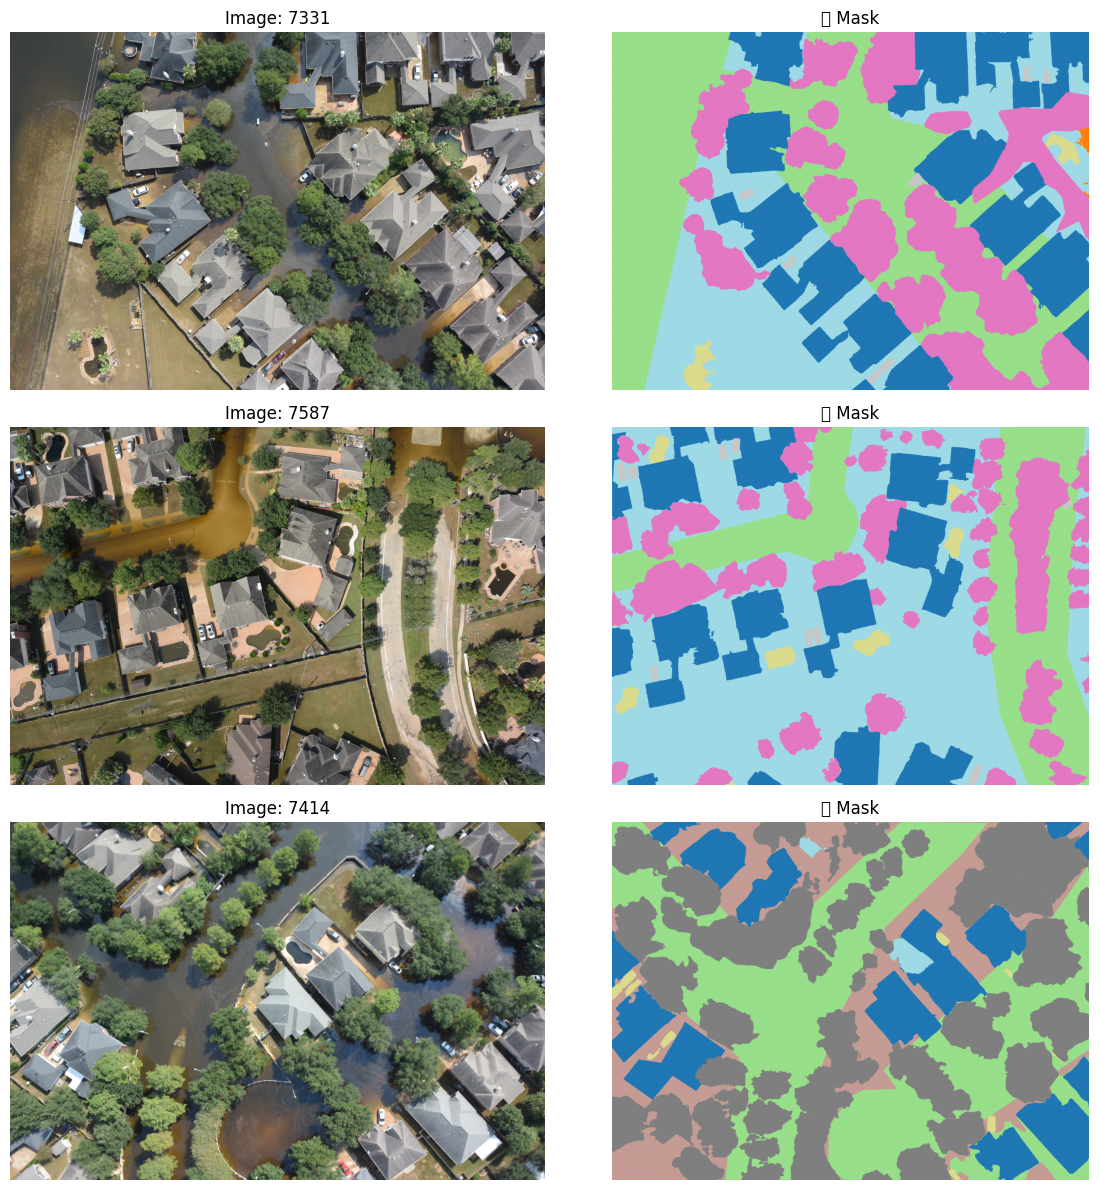

Non-Flooded Examples:


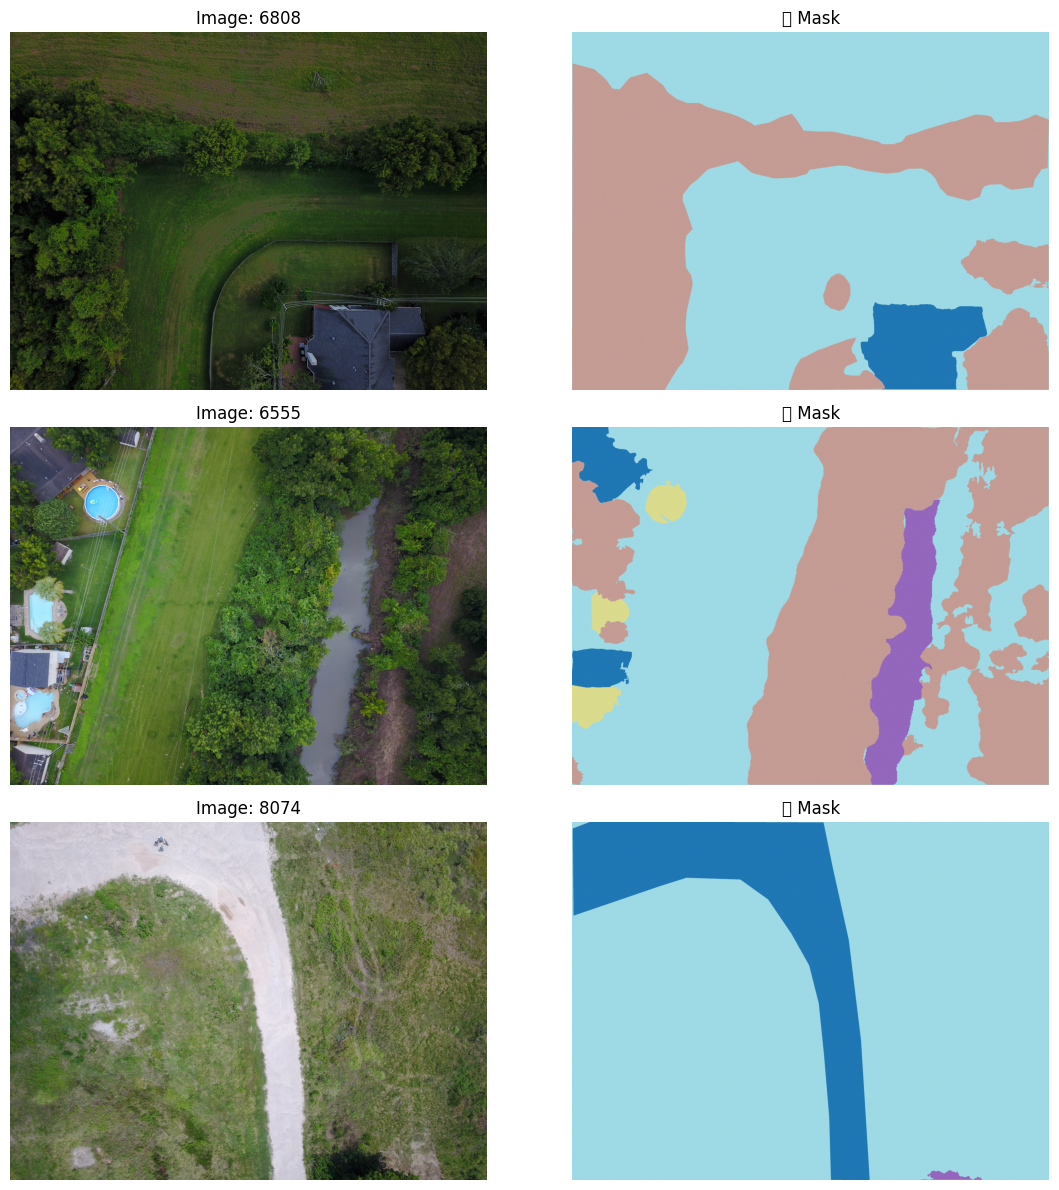

In [4]:
def show_random_samples(img_dir, mask_dir, n=3):
    img_paths = glob(os.path.join(img_dir, "*"))
    mask_paths = glob(os.path.join(mask_dir, "*"))
    samples = random.sample(img_paths, n)

    plt.figure(figsize=(12, n * 4))
    for i, img_path in enumerate(samples):
        base = os.path.splitext(os.path.basename(img_path))[0]
        matching_mask = [m for m in mask_paths if base in m or base + "_lab" in m]
        if not matching_mask:
            continue
        mask_path = matching_mask[0]
        
        img = np.array(Image.open(img_path))
        mask = np.array(Image.open(mask_path))

        plt.subplot(n, 2, 2*i + 1)
        plt.imshow(img)
        plt.title(f"Image: {base}")
        plt.axis("off")

        plt.subplot(n, 2, 2*i + 2)
        plt.imshow(mask, cmap="tab20")
        plt.title("🎯 Mask")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

print("Flooded Examples:")
show_random_samples(IMG_FLOODED, MASK_FLOODED)

print("Non-Flooded Examples:")
show_random_samples(IMG_NON_FLOODED, MASK_NON_FLOODED)

Computing class frequency distribution...


Scanning mask_non_flooded: 100%|██████████████| 347/347 [00:26<00:00, 12.94it/s]


Class Frequency Summary:
Class  0: 1.3321% of total pixels
Class  1: 1.6022% of total pixels
Class  2: 2.9791% of total pixels
Class  3: 1.9025% of total pixels
Class  4: 5.2537% of total pixels
Class  5: 12.3576% of total pixels
Class  6: 16.5494% of total pixels
Class  7: 0.1823% of total pixels
Class  8: 0.1926% of total pixels
Class  9: 57.6486% of total pixels


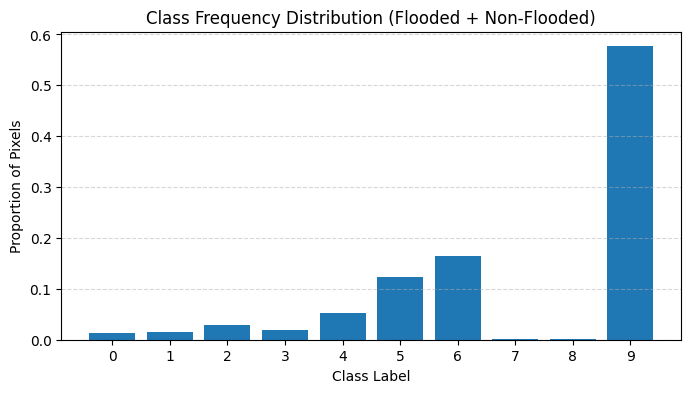

In [5]:
from tqdm import tqdm

def compute_class_frequencies(mask_dirs):
    class_counts = {}
    for mask_dir in mask_dirs:
        mask_paths = glob(os.path.join(mask_dir, "*.png"))
        for m_path in tqdm(mask_paths, desc=f"Scanning {os.path.basename(mask_dir)}"):
            mask = np.array(Image.open(m_path))
            unique, counts = np.unique(mask, return_counts=True)
            for cls, cnt in zip(unique, counts):
                class_counts[cls] = class_counts.get(cls, 0) + cnt
    return class_counts

print("Computing class frequency distribution...")
class_freqs = compute_class_frequencies([MASK_FLOODED, MASK_NON_FLOODED])

# Normalize counts
total_pixels = sum(class_freqs.values())
sorted_items = sorted(class_freqs.items(), key=lambda x: x[0])
print("\nClass Frequency Summary:")
for cls, cnt in sorted_items:
    print(f"Class {cls:>2}: {cnt / total_pixels:.4%} of total pixels")

# Visualization
plt.figure(figsize=(8,4))
plt.bar([str(k) for k,_ in sorted_items], [v/total_pixels for _,v in sorted_items])
plt.title("Class Frequency Distribution (Flooded + Non-Flooded)")
plt.xlabel("Class Label")
plt.ylabel("Proportion of Pixels")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [6]:
import json
import numpy as np

# Compute normalized weights (inverse frequency)
class_weights = {}
for cls, cnt in sorted_items:
    cls = int(cls)  # convert np.uint8 → int
    freq = cnt / total_pixels
    class_weights[cls] = round(1 / (freq + 1e-6), 4)

# Normalize weights to [0,1]
max_w = max(class_weights.values())
class_weights = {cls: round(w / max_w, 4) for cls, w in class_weights.items()}

save_path = "../data/class_frequencies_weights.json"
class_freqs_dict = {int(cls): float(cnt / total_pixels) for cls, cnt in sorted_items}

with open(save_path, "w") as f:
    json.dump({
        "class_frequencies": class_freqs_dict,
        "class_weights": class_weights
    }, f, indent=4)

print(f"Saved class frequency + weights to {save_path}")
print(json.dumps(class_weights, indent=4))

Saved class frequency + weights to ../data/class_frequencies_weights.json
{
    "0": 0.1369,
    "1": 0.1138,
    "2": 0.0612,
    "3": 0.0958,
    "4": 0.0347,
    "5": 0.0148,
    "6": 0.011,
    "7": 1.0,
    "8": 0.9464,
    "9": 0.0032
}
